In [1]:
import pandas as pd
patients = pd.read_csv("patients.csv")
conditions = pd.read_csv("conditions.csv")



merged = pd.merge(conditions, patients, left_on="Patient_id", right_on="Id")
merged.drop(["Patient_id"], inplace=True, axis=1)
merged
#print(conditions[conditions["Diagnosis"] == ("Suspected lung cancer (situation)")])


,Start,End,Encounter_id,Diagnosis,Id,BirthDate,DeathDate,Gender
0,23/06/1983,NaN,0f46bb2b-8b81-e452-4105-f3dcb2a69521,Received higher education (finding),f57a77b1-8990-1c66-fbb1-06a27340de59,29/04/1965,NaN,M
1,18/07/2002,NaN,7aa05895-178b-a677-0f9c-2b4985fffed3,Prediabetes,f57a77b1-8990-1c66-fbb1-06a27340de59,29/04/1965,NaN,M
2,10/05/2007,NaN,2c4e23d8-8f5b-d2d7-3e11-47cca9e767b7,Anemia (disorder),f57a77b1-8990-1c66-fbb1-06a27340de59,29/04/1965,NaN,M
3,10/05/2007,NaN,2c4e23d8-8f5b-d2d7-3e11-47cca9e767b7,Hyperlipidemia,f57a77b1-8990-1c66-fbb1-06a27340de59,29/04/1965,NaN,M
4,28/01/2011,NaN,1c562467-bfcc-38b5-55db-591163ffe981,Acute ST segment elevation myocardial infarcti...,f57a77b1-8990-1c66-fbb1-06a27340de59,29/04/1965,NaN,M
...,...,...,...,...,...,...,...,...
45674,02/07/2000,NaN,9302a001-5c01-eb21-ebce-34e3b40f6ab9,Hypertriglyceridemia (disorder),f8442c87-1636-df9a-18c7-f63100390bc2,12/01/1941,23/08/2001,F
45675,09/07/2000,01/08/2000,bd08d21f-9707-6e2d-8622-491a670d35f8,Viral sinusitis (disorder),f8442c87-1636-df9a-18c7-f63100390bc2,12/01/1941,23/08/2001,F
45676,19/01/2001,NaN,4c30f7ee-1991-e9ee-e3b4-2f068f21adb1,Polyp of colon,f8442c87-1636-df9a-18c7-f63100390bc2,12/01/1941,23/08/2001,F
45677,25/03/2001,04/04/2001,5e321632-f687-4a48-381b-8823350f49d8,Viral sinusitis (disorder),f8442c87-1636-df9a-18c7-f63100390bc2,12/01/1941,23/08/2001,F


In [2]:
from datetime import datetime, timedelta
diagnosis_start = merged[merged["Diagnosis"] == "Suspected lung cancer (situation)"]

diagnosis_start["Start"] = pd.to_datetime(diagnosis_start["Start"], format="%d/%m/%Y")
diagnosis_start["DeathDate"] = pd.to_datetime(diagnosis_start["DeathDate"], format="%d/%m/%Y")

diagnosis_start["date_difference"] = diagnosis_start["DeathDate"] - diagnosis_start["Start"]

diagnosis_start["lived_5_years"] = ((diagnosis_start["DeathDate"] - diagnosis_start["Start"]).dt.days > 5*365) | (diagnosis_start["DeathDate"].isna())




five_years_ago = datetime.now() - timedelta(days=5*365)
#print(diagnosis_start[diagnosis_start["Start"] > five_years_ago]["DeathDate"].isna().value_counts())

# drop rows that have diagnose less than 5 years ago and have no deathdate
diagnosis_start.drop(diagnosis_start[(diagnosis_start["Start"] > five_years_ago) & (diagnosis_start["DeathDate"].isna())].index, inplace=True)
diagnosis_start

/tmp/ipykernel_34272/141060289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_start["Start"] = pd.to_datetime(diagnosis_start["Start"], format="%d/%m/%Y")
/tmp/ipykernel_34272/141060289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_start["DeathDate"] = pd.to_datetime(diagnosis_start["DeathDate"], format="%d/%m/%Y")
/tmp/ipykernel_34272/141060289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Start,End,Encounter_id,Diagnosis,Id,BirthDate,DeathDate,Gender,date_difference,lived_5_years
87,2015-03-26,NaN,0f702a39-b6e6-a573-ed83-9ac471d41dd2,Suspected lung cancer (situation),46281552-1aa8-7cc8-462c-6a3ee0609099,05/07/1962,2020-06-05,F,1898 days,True
131,2009-01-04,NaN,0f0912e3-0efd-d090-aed6-91a2192e1474,Suspected lung cancer (situation),53bdf14e-b1d6-2852-b0cf-77b9df861c6e,05/07/1962,2011-08-21,F,959 days,False
165,2018-03-12,NaN,d83a6a28-cef2-9fb7-e332-784d63988e28,Suspected lung cancer (situation),744df0a3-7b3a-961e-19fc-cb1c4fa73cf4,15/12/1969,2020-04-18,F,768 days,False
196,2016-09-14,NaN,2852b92c-1a40-ea6f-6e97-516c35cd3c96,Suspected lung cancer (situation),2a14b213-f44a-ccee-4ffc-64ef67f65f7b,05/07/1962,2020-07-05,F,1390 days,False
317,2018-03-26,NaN,adb2c65d-c480-8dba-3f61-d2a0a13952cb,Suspected lung cancer (situation),c56b49b6-3d99-7e04-9b9c-67797ad49253,15/12/1969,2021-10-17,F,1301 days,False
...,...,...,...,...,...,...,...,...,...,...
45108,1985-11-29,NaN,320d2775-7d7f-7ca2-1f56-4a773e8b14b4,Suspected lung cancer (situation),6e7146bb-476d-90d7-d3e8-fb46773491e0,12/12/1934,1988-04-02,M,855 days,False
45148,2003-11-02,NaN,b7c28f4f-76aa-f94e-ccf4-8ef18d990750,Suspected lung cancer (situation),7d350667-99ef-de9d-76e0-5b4fd4b9e872,12/12/1934,2007-11-28,M,1487 days,False
45233,1986-01-01,NaN,8e5d19b4-4315-e84b-c897-dcc06c29fc31,Suspected lung cancer (situation),b14c6b49-d283-1339-e69e-cdc76774e0c8,22/06/1931,1988-12-29,F,1093 days,False
45474,2010-10-20,NaN,98443e46-86c9-d353-f954-c7424a8baa31,Suspected lung cancer (situation),493400a7-40cb-3b16-7fb7-76ca78287852,12/12/1934,2015-10-29,M,1835 days,True


In [3]:
diagnosis_start["date_difference"].quantile(0.01)

Timedelta('508 days 12:57:36')

In [4]:
encoded = pd.get_dummies(conditions, columns=["Diagnosis"])


columns = encoded.columns[4:]
#for i in range(4, encoded.columns.count):
 #   print(encoded.columns[i])
aggregated = encoded.groupby("Patient_id").agg({**{col: 'max' for col in columns}})
aggregated

,Diagnosis_Abnormal findings diagnostic imaging heart+coronary circulat (finding),Diagnosis_Acute Cholecystitis,Diagnosis_Acute ST segment elevation myocardial infarction (disorder),Diagnosis_Acute bacterial sinusitis (disorder),Diagnosis_Acute bronchitis (disorder),Diagnosis_Acute deep venous thrombosis (disorder),Diagnosis_Acute infective cystitis (disorder),Diagnosis_Acute non-ST segment elevation myocardial infarction (disorder),Diagnosis_Acute pulmonary embolism (disorder),Diagnosis_Acute respiratory failure (disorder),...,Diagnosis_Traumatic brain injury (disorder),Diagnosis_Traumatic injury of spinal cord and/or vertebral column (disorder),Diagnosis_Tubal pregnancy,Diagnosis_Unemployed (finding),Diagnosis_Unhealthy alcohol drinking behavior (finding),Diagnosis_Victim of intimate partner abuse (finding),Diagnosis_Viral sinusitis (disorder),Diagnosis_Vomiting symptom (finding),Diagnosis_Wheezing (finding),Diagnosis_Whiplash injury to neck
Patient_id,,,,,,,,,,,,,,,,,,,,,
00c31453-432b-21bb-fb46-3d42ba1c353b,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
018bdaba-d2a5-5922-fba7-91023e519bde,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
01a8014e-c54b-5bd2-5768-c54dbcf4f54f,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
01dbfef7-0fe5-99a4-ad97-ff32c0f724fc,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
02654c5b-1709-61a2-5578-4f7ce58a4df9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fc82fa4d-7093-9921-b675-71a5db9921e5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
fd160817-4cdd-5000-7ff0-630ff022e240,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
fdfeedc4-a6e4-1d65-1ac1-39ed620c105c,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [5]:
with_date = pd.merge(aggregated, diagnosis_start[["Id", "lived_5_years", "Gender"]], left_on="Patient_id", right_on="Id")
with_date["Gender"] = with_date["Gender"] == "F"
with_date

,Diagnosis_Abnormal findings diagnostic imaging heart+coronary circulat (finding),Diagnosis_Acute Cholecystitis,Diagnosis_Acute ST segment elevation myocardial infarction (disorder),Diagnosis_Acute bacterial sinusitis (disorder),Diagnosis_Acute bronchitis (disorder),Diagnosis_Acute deep venous thrombosis (disorder),Diagnosis_Acute infective cystitis (disorder),Diagnosis_Acute non-ST segment elevation myocardial infarction (disorder),Diagnosis_Acute pulmonary embolism (disorder),Diagnosis_Acute respiratory failure (disorder),...,Diagnosis_Unemployed (finding),Diagnosis_Unhealthy alcohol drinking behavior (finding),Diagnosis_Victim of intimate partner abuse (finding),Diagnosis_Viral sinusitis (disorder),Diagnosis_Vomiting symptom (finding),Diagnosis_Wheezing (finding),Diagnosis_Whiplash injury to neck,Id,lived_5_years,Gender
0,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,00c31453-432b-21bb-fb46-3d42ba1c353b,False,True
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,01a8014e-c54b-5bd2-5768-c54dbcf4f54f,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,01dbfef7-0fe5-99a4-ad97-ff32c0f724fc,False,True
3,True,False,False,False,False,False,True,True,False,False,...,True,False,True,False,False,False,False,02781c5e-a886-4d49-2ed6-98abeee54f6c,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,02f2e324-858c-0bfe-59eb-46d08cbd8cbe,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,fc82fa4d-7093-9921-b675-71a5db9921e5,False,False
609,True,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,fd160817-4cdd-5000-7ff0-630ff022e240,False,True
610,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,fdfeedc4-a6e4-1d65-1ac1-39ed620c105c,False,True
611,True,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,fe60d2db-8855-c641-84e5-8fd9325e6973,False,False


# Careplans

In [6]:
careplans = pd.read_csv("careplans.csv")
#print(careplans[(careplans["Reason"] == "Non-small cell carcinoma of lung  TNM stage 1 (disorder)")])
#print(careplans[(careplans["Reason"] == "Primary small cell malignant neoplasm of lung  TNM stage 1 (disorder)")])

careplans_date = pd.merge(diagnosis_start[["Start", "Id"]], careplans, left_on="Id", right_on="Patient_id")
careplans_date = careplans_date[careplans_date["Reason"].isin(["Primary small cell malignant neoplasm of lung  TNM stage 1 (disorder)", "Non-small cell carcinoma of lung  TNM stage 1 (disorder)"])]
careplans_date["CarePlan_Start"] = pd.to_datetime(careplans_date["CarePlan_Start"], format="%d/%m/%Y")
careplans_date["date_difference"] = careplans_date["CarePlan_Start"] - careplans_date["Start"]
careplans_date["date_difference"] = careplans_date["date_difference"].dt.days

with_date = pd.merge(with_date, careplans_date[["Id", "date_difference"]], on="Id")
with_date

,Diagnosis_Abnormal findings diagnostic imaging heart+coronary circulat (finding),Diagnosis_Acute Cholecystitis,Diagnosis_Acute ST segment elevation myocardial infarction (disorder),Diagnosis_Acute bacterial sinusitis (disorder),Diagnosis_Acute bronchitis (disorder),Diagnosis_Acute deep venous thrombosis (disorder),Diagnosis_Acute infective cystitis (disorder),Diagnosis_Acute non-ST segment elevation myocardial infarction (disorder),Diagnosis_Acute pulmonary embolism (disorder),Diagnosis_Acute respiratory failure (disorder),...,Diagnosis_Unhealthy alcohol drinking behavior (finding),Diagnosis_Victim of intimate partner abuse (finding),Diagnosis_Viral sinusitis (disorder),Diagnosis_Vomiting symptom (finding),Diagnosis_Wheezing (finding),Diagnosis_Whiplash injury to neck,Id,lived_5_years,Gender,date_difference
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,00c31453-432b-21bb-fb46-3d42ba1c353b,False,True,16
1,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,01a8014e-c54b-5bd2-5768-c54dbcf4f54f,False,False,14
2,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,01dbfef7-0fe5-99a4-ad97-ff32c0f724fc,False,True,11
3,True,False,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,02781c5e-a886-4d49-2ed6-98abeee54f6c,False,False,29
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,02f2e324-858c-0bfe-59eb-46d08cbd8cbe,False,False,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,True,fc82fa4d-7093-9921-b675-71a5db9921e5,False,False,8
608,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,fd160817-4cdd-5000-7ff0-630ff022e240,False,True,45
609,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,fdfeedc4-a6e4-1d65-1ac1-39ed620c105c,False,True,11
610,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,fe60d2db-8855-c641-84e5-8fd9325e6973,False,False,28


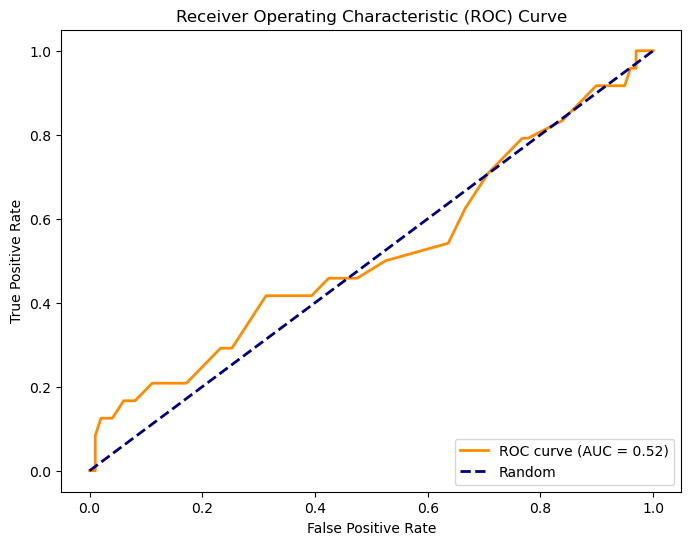

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


X = with_date.drop(['Id', 'lived_5_years'], axis=1)
y = pd.to_numeric(with_date["lived_5_years"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


# Make predictions on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()